In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:\\Users\\deeks\\Documents\\PhD\\PHD_TrainData_and_ProblemStatement-1558070454703\\PHD_TrainData_and_ProblemStatement")

In [3]:
train_data=pd.read_excel("Train.xlsx",header=0)
test_data=pd.read_excel("Test.xlsx",header=0)

In [4]:
train_data.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [5]:
test_data.isnull().sum()

ReportID           0
SalesPersonID      0
ProductID          0
Quantity           0
TotalSalesValue    0
dtype: int64

In [6]:
train_data.describe(include='all')

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
count,42582,42582,42582,4.258200e+04,4.258200e+04,42582
unique,42582,992,593,NaN,NaN,3
top,Rep13382,C21976,PR6253,NaN,NaN,indeterminate
freq,1,1359,2590,NaN,NaN,39846
mean,NaN,NaN,NaN,4.910048e+03,1.620923e+04,NaN
std,NaN,NaN,NaN,9.833621e+04,5.997195e+04,NaN
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN
75%,NaN,NaN,NaN,1.136000e+03,1.076500e+04,NaN


In [7]:
print(train_data.ProductID.unique().shape)
print(train_data.SalesPersonID.unique().shape)
print(train_data.ReportID.unique().shape)

(593,)
(992,)
(42582,)


In [8]:
100*train_data.Suspicious.value_counts()/len(train_data.Suspicious)

indeterminate    93.574750
No                6.000188
Yes               0.425062
Name: Suspicious, dtype: float64

In [9]:
y = train_data["Suspicious"]
X = train_data.drop('Suspicious', axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [11]:
X_train['Price_of_oneProduct'] = X_train.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)
X_test['Price_of_oneProduct'] = X_test.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)

In [12]:
X_train_df=X_train.groupby(["ProductID"]).median()
X_test_df=X_test.groupby(["ProductID"]).median()

In [13]:
X_train_df=X_train_df.drop(['TotalSalesValue','Quantity'],axis = 1)
X_test_df=X_test_df.drop(['TotalSalesValue','Quantity'],axis = 1)

In [14]:
X_train_df=X_train_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})
X_test_df=X_test_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})

In [15]:
X_train_updated = X_train.join(X_train_df, on='ProductID')
X_test_updated = X_test.join(X_test_df, on='ProductID')

X_train_data1 = X_train_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_train_data1 = X_train_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
X_train_updated = X_train_updated.join(X_train_data1,on = ['SalesPersonID'])

X_test_data1 = X_test_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_test_data1 = X_test_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
X_test_updated = X_test_updated.join(X_test_data1,on = ['SalesPersonID'])

In [16]:
print(X_train_updated.shape)
print(X_test_updated.shape)

(34065, 7)
(8517, 7)


In [17]:
X_train_data2 = X_train_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
X_train_data2 = X_train_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
X_train_updated = X_train_updated.join(X_train_data2,on=['SalesPersonID'])

In [18]:
X_test_data2 = X_test_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
X_test_data2 = X_test_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
X_test_updated = X_test_updated.join(X_test_data2,on=['SalesPersonID'])

X_train_data3 = X_train_updated.groupby(['SalesPersonID'])[['ProductID']].count()
X_train_data3 = X_train_data3.rename(columns={'ProductID': 'No of products per person'})
X_train_updated = X_train_updated.join(X_train_data3,on=['SalesPersonID'])

X_test_data3 = X_test_updated.groupby(['SalesPersonID'])[['ProductID']].count()
X_test_data3 = X_test_data3.rename(columns={'ProductID': 'No of products per person'})
X_test_updated = X_test_updated.join(X_test_data3,on=['SalesPersonID'])

In [19]:
X_train_data4 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
X_train_data4=X_train_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
X_train_updated = X_train_updated.join(X_train_data4,on=['SalesPersonID','ProductID'])

In [20]:
X_test_data4 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
X_test_data4=X_test_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
X_test_updated = X_test_updated.join(X_test_data4,on=['SalesPersonID','ProductID'])

X_train_data5 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
X_train_data5 =X_train_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
X_train_updated = X_train_updated.join(X_train_data5,on=['SalesPersonID','ProductID'])

X_test_data5 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
X_test_data5 =X_test_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
X_test_updated = X_test_updated.join(X_test_data5,on=['SalesPersonID','ProductID'])

In [21]:
X_train_data6 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
X_train_data6 =X_train_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
X_train_updated = X_train_updated.join(X_train_data6,on=['SalesPersonID','ProductID'])

In [22]:
X_test_data6 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
X_test_data6 =X_test_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
X_test_updated = X_test_updated.join(X_test_data6,on=['SalesPersonID','ProductID'])

X_train_data7 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
X_train_data7 =X_train_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
X_train_updated = X_train_updated.join(X_train_data7,on=['SalesPersonID','ProductID'])

X_test_data7 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
X_test_data7 =X_test_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
X_test_updated = X_test_updated.join(X_test_data7,on=['SalesPersonID','ProductID'])

In [23]:
X_train_data8=X_train_updated.groupby(['ProductID'])[['Quantity']].mean()
X_train_data8 = X_train_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
X_train_updated = X_train_updated.join(X_train_data8,on=['ProductID'])

In [24]:
X_test_data8=X_test_updated.groupby(['ProductID'])[['Quantity']].mean()
X_test_data8 = X_test_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
X_test_updated = X_test_updated.join(X_test_data8,on=['ProductID'])

In [25]:
X_train_data9=X_train_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_train_data9 = X_train_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
X_train_updated = X_train_updated.join(X_train_data9,on=['ProductID'])

In [26]:
X_test_data9=X_test_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_test_data9 = X_test_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
X_test_updated = X_test_updated.join(X_test_data9,on=['ProductID'])

In [27]:
X_train_data10=X_train_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_train_data10 = X_train_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
X_train_updated = X_train_updated.join(X_train_data10,on=['ProductID'])

In [28]:
X_test_data10=X_test_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_test_data10 = X_test_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
X_test_updated = X_test_updated.join(X_test_data10,on=['ProductID'])

X_train_data11 = X_train_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_train_data11 = X_train_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
X_train_updated = X_train_updated.join(X_train_data11,on=['SalesPersonID'])

X_test_data11 = X_test_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_test_data11 = X_test_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
X_test_updated = X_test_updated.join(X_test_data11,on=['SalesPersonID'])

X_train_updated['ratio for quantity per person'] = X_train_updated['Quantity']/X_train_updated['Average amount Quantity per Person']
X_test_updated['ratio for quantity per person'] = X_test_updated['Quantity']/X_test_updated['Average amount Quantity per Person']

X_train_updated['ratio for salesvalue per person'] = X_train_updated['TotalSalesValue']/X_train_updated['Average salesvalue per Person']
X_test_updated['ratio for salesvalue per person'] = X_test_updated['TotalSalesValue']/X_test_updated['Average salesvalue per Person']

In [29]:
test_data['Price_of_oneProduct'] = test_data.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)

In [30]:
test_df=test_data.groupby(["ProductID"]).median()
test_df=test_df.drop(['TotalSalesValue','Quantity'],axis = 1)
test_df=test_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})
test_data_updated = test_data.join(test_df, on='ProductID')

In [31]:
test_data1 = test_data_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
test_data1 = test_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
test_data_updated = test_data_updated.join(test_data1,on = ['SalesPersonID'])

In [32]:
test_data2 = test_data_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
test_data2 = test_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
test_data_updated = test_data_updated.join(test_data2,on=['SalesPersonID'])

test_data3 = test_data_updated.groupby(['SalesPersonID'])[['ProductID']].count()
test_data3 = test_data3.rename(columns={'ProductID': 'No of products per person'})
test_data_updated = test_data_updated.join(test_data3,on=['SalesPersonID'])

test_data4 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
test_data4=test_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
test_data_updated = test_data_updated.join(test_data4,on=['SalesPersonID','ProductID'])

test_data5 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
test_data5 =test_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
test_data_updated = test_data_updated.join(test_data5,on=['SalesPersonID','ProductID'])

In [33]:
test_data6 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
test_data6 =test_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
test_data_updated = test_data_updated.join(test_data6,on=['SalesPersonID','ProductID'])

test_data7 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
test_data7 =test_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
test_data_updated = test_data_updated.join(test_data7,on=['SalesPersonID','ProductID'])

In [34]:
test_data8 = test_data_updated.groupby(['ProductID'])[['Quantity']].mean()
test_data8 = test_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
test_data_updated = test_data_updated.join(test_data8,on=['ProductID'])

In [35]:
test_data9=test_data_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
test_data9 = test_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
test_data_updated = test_data_updated.join(test_data9,on=['ProductID'])

In [36]:
test_data10 = test_data_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
test_data10 = test_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
test_data_updated = test_data_updated.join(test_data10,on=['ProductID'])

test_data11 = test_data_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
test_data11 = test_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
test_data_updated = test_data_updated.join(test_data11,on=['SalesPersonID'])

test_data_updated['ratio for quantity per person'] = test_data_updated['Quantity']/test_data_updated['Average amount Quantity per Person']

test_data_updated['ratio for salesvalue per person'] = test_data_updated['TotalSalesValue']/test_data_updated['Average salesvalue per Person']

In [37]:
print(X_train_updated.shape)
print(X_test_updated.shape)
print(test_data_updated.shape)

(34065, 13)
(8517, 13)
(9135, 13)


In [38]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [39]:
y_train=y_train.Suspicious.replace(['Yes','No','indeterminate'],['1','2','3'])
y_test=y_test.Suspicious.replace(['Yes','No','indeterminate'],['1','2','3'])

In [40]:
X_train_updated=X_train_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)
X_test_updated=X_test_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)
test_data_updated=test_data_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)

In [41]:
test_data_updated.head()

,Quantity,TotalSalesValue,Price_of_oneProduct,Avg_of_eachProduct,Average sales per person,Average amount Quantity per Person,Avg of each product sales per person,Average amount Quantity per Product,Average sales per Product,Average salesvalue per Product
0,102,1115,10.931373,9.437500,1095.0,147.3,1115.0,192.702128,1455.0,1455.0
1,102,1050,10.294118,10.869565,1095.0,147.3,1050.0,387.523077,1450.0,1450.0
2,344,3490,10.145349,10.849359,1095.0,147.3,2252.5,729.142384,2210.0,2210.0
3,108,1095,10.138889,15.594714,1095.0,147.3,1095.0,130.835443,2000.0,2000.0
4,146,1055,7.226027,9.501085,1095.0,147.3,1090.0,204.454545,1090.0,1090.0


X_train_updated=X_train_updated.drop(['ReportID', 'SalesPersonID', 'ProductID','Average sales per person','Average amount Quantity per Person','sum of each product quuantity per person'],axis=1)
X_test_updated=X_test_updated.drop(['ReportID', 'SalesPersonID', 'ProductID','Average sales per person','Average amount Quantity per Person','sum of each product quuantity per person'],axis=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_updated = sc.fit_transform(X_train_updated)
X_test_updated = sc.transform(X_test_updated)
test_data_updated=sc.transform(test_data_updated)

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1) 
param_grid = {"criterion": ["gini", "entropy"],
              "max_features": [2,3,4,5,6,7,8,9,10,11,12,13,14],
              "n_estimators":[100,200,300,400,500,600,700,800,900,1000],
              "min_samples_leaf":[1,3,5],
              "max_depth": [2,5,7,9,11,13],
              }
scores = ['precision', 'recall']

clf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",random_state=42)
rf = GridSearchCV(clf, param_grid, cv=10)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"criterion": ["gini", "entropy"],
              "n_estimators":[300,400,600,700],
              "min_samples_leaf":[1,3,5],
              "max_depth": [2,5,7],
              }

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rf= RandomForestClassifier(criterion='gini',n_estimators=450,max_features=2,class_weight="balanced",max_depth=4) 
dt = tree.DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=3,max_features=2)
#rf= GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

In [43]:
rf.fit(X_train_updated,y_train)
dt.fit(X_train_updated,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=250,gamma=0.8,learning_rate=0.2,max_depth=2)

In [45]:
xgb.fit(X_train_updated,y_train);

In [46]:
pred_train_xgb=xgb.predict(X_train_updated)
pred_test_xgb=xgb.predict(X_test_updated)

In [47]:
pred_train_rf=rf.predict(X_train_updated)
pred_test_rf=rf.predict(X_test_updated)

In [48]:
pred_train_dt=dt.predict(X_train_updated)
pred_test_dt=dt.predict(X_test_updated)

In [49]:
from sklearn.metrics import confusion_matrix
cm_train_rf=confusion_matrix(pred_train_rf,y_train)
cm_test_rf=confusion_matrix(pred_test_rf,y_test)
print("confusion matrix for Random Forest Model")
print(cm_train_rf)
print(cm_test_rf)

confusion matrix for Random Forest Model
[[  119    30  1637]
 [   10  1330  6556]
 [   16   684 23683]]
[[  19    7  321]
 [   6  258 1431]
 [  11  246 6218]]


In [50]:
cm_train_dt=confusion_matrix(pred_train_dt,y_train)
cm_test_dt=confusion_matrix(pred_test_dt,y_test)
print("confusion matrix for Decision Tree Model")
print(cm_train_dt)
print(cm_test_dt)

confusion matrix for Decision Tree Model
[[  126   479  6365]
 [    0     0     0]
 [   19  1565 25511]]
[[  22   83 1118]
 [   0    0    0]
 [  14  428 6852]]


cm_train_xgb=confusion_matrix(pred_train_xgb,y_train)
cm_test_xgb=confusion_matrix(pred_test_xgb,y_test)
print("confusion matrix for XG Boost Model")
print(cm_train_xgb)
print(cm_test_xgb)

In [51]:
from sklearn.metrics import classification_report
print("classification Report for Random Forest Model")
print(classification_report(y_train,pred_train_rf))
print(classification_report(y_test,pred_test_rf))

classification Report for Random Forest Model
              precision    recall  f1-score   support

           1       0.07      0.82      0.12       145
           2       0.17      0.65      0.27      2044
           3       0.97      0.74      0.84     31876

   micro avg       0.74      0.74      0.74     34065
   macro avg       0.40      0.74      0.41     34065
weighted avg       0.92      0.74      0.80     34065

              precision    recall  f1-score   support

           1       0.05      0.53      0.10        36
           2       0.15      0.50      0.23       511
           3       0.96      0.78      0.86      7970

   micro avg       0.76      0.76      0.76      8517
   macro avg       0.39      0.60      0.40      8517
weighted avg       0.91      0.76      0.82      8517



In [52]:
print("classification Report for Decision Tree Model")
print(classification_report(y_train,pred_train_dt))
print(classification_report(y_test,pred_test_dt))

classification Report for Decision Tree Model
              precision    recall  f1-score   support

           1       0.02      0.87      0.04       145
           2       0.00      0.00      0.00      2044
           3       0.94      0.80      0.87     31876

   micro avg       0.75      0.75      0.75     34065
   macro avg       0.32      0.56      0.30     34065
weighted avg       0.88      0.75      0.81     34065

              precision    recall  f1-score   support

           1       0.02      0.61      0.03        36
           2       0.00      0.00      0.00       511
           3       0.94      0.86      0.90      7970

   micro avg       0.81      0.81      0.81      8517
   macro avg       0.32      0.49      0.31      8517
weighted avg       0.88      0.81      0.84      8517



print("Classification Report of XG Boost Model")
print(classification_report(y_train,pred_train_xgb))
print(classification_report(y_test,pred_test_xgb))

In [53]:
test_pred_rf = rf.predict(test_data_updated)

num_cols=['Quantity', 'TotalSalesValue', 'Price_of_oneProduct',
       'Avg_of_eachProduct', 'Average amount Quantity per Person',
       'sum of each product quuantity per person',
       'Avg of each product sales per person',
       'Average amount Quantity per Product', 'Average sales per Product',
       'Average salesvalue per Product']

test_pred_xgb=xgb.predict(test_data_updated)

test_pred_rf=pd.DataFrame(test_pred_rf)

In [54]:
features = X_train_updated.columns
importances_rf = rf.feature_importances_
importances_xgb=xgb.feature_importances_
indices_rf = np.argsort(importances_rf)
indices_xgb=np.argsort(importances_xgb)

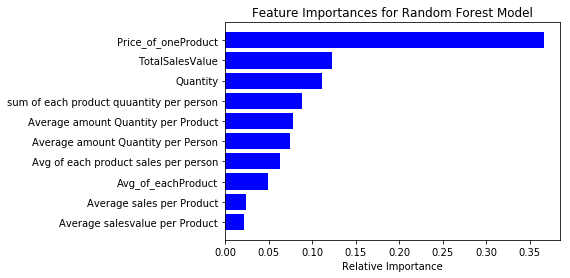

In [55]:
plt.title('Feature Importances for Random Forest Model')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

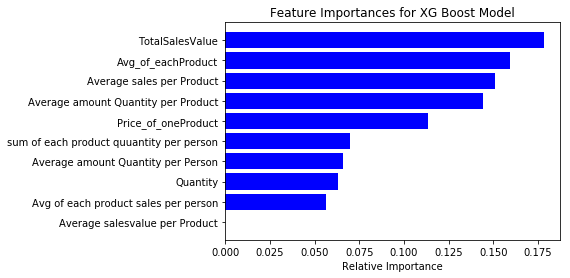

In [56]:
plt.title('Feature Importances for XG Boost Model')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], color='b', align='center')
plt.yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()

sub_file=pd.read_csv("samplesubmission-1558719607492.csv")

sub_file.head()

sub_file=sub_file.drop(['Unnamed: 0'],axis=1)

sub_file.head()

sub_file['Suspicious']=test_pred_rf

sub_file.to_csv('samplesubmission_rf_3.csv',index=False)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X_train_updated,y_train)

print(model.feature_importances_)